In [ ]:
pip install opencv-python

In [ ]:
pip install numpy

In [5]:
pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [7]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


In [8]:
pip install tqdm


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for glob


In [10]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [11]:
train_path="DATASET/TRAIN"
test_path="DATASET/TEST"

In [12]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:

# visualization
x_data=[]
y_data=[]
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        img_array=cv2.resize(img_array,(224,224))
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])
data = pd.DataFrame({"image":x_data,"label":y_data})

100%|██████████| 9999/9999 [01:48<00:00, 92.56it/s] 


In [14]:
data.shape

(22564, 2)

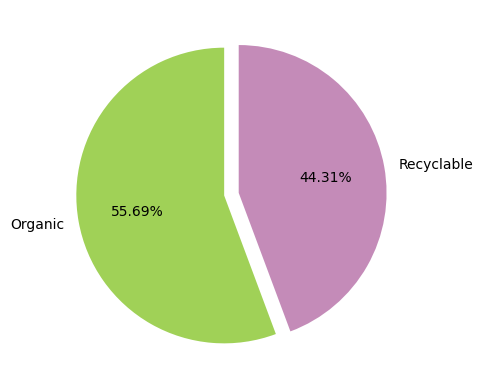

In [15]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()

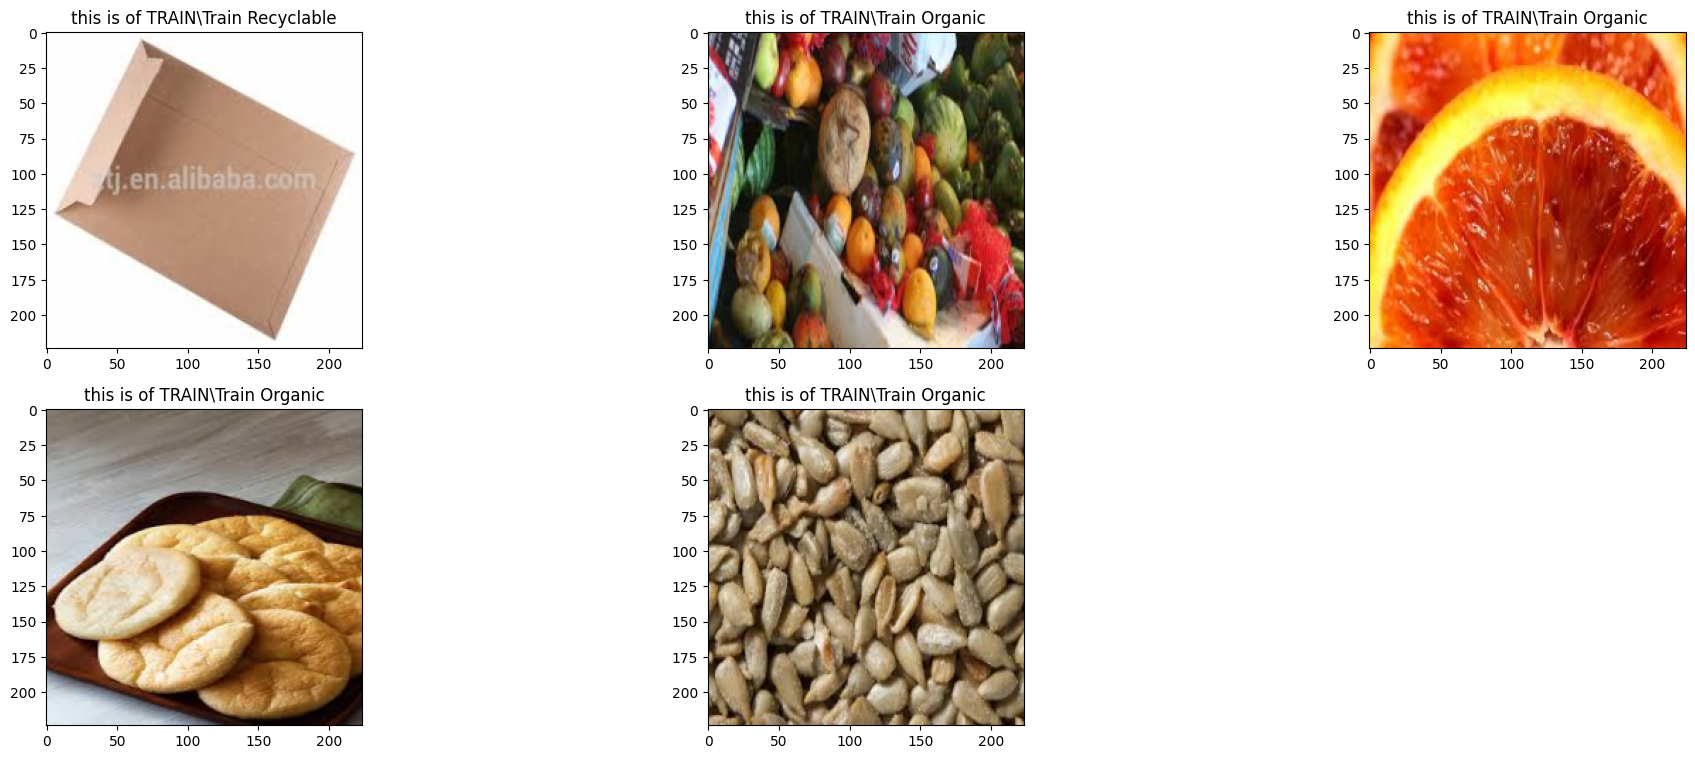

In [16]:
plt.figure(figsize=(20, 15))
for i in range(5):
    plt.subplot(4, 3, (i%12) + 1)
    index = np.random.randint(15000)
    plt.title("this is of {0}".format(data['label'][index]))
    plt.imshow(data['image'][index])
    plt.tight_layout()

## CNN - Convolutional Neural Networks

In [17]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
train_datagen =ImageDataGenerator(rescale=1./255)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator =train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=256, color_mode='rgb', class_mode='categorical')
test_generator =test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=256, color_mode='rgb', class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2511 images belonging to 2 classes.


In [22]:
hist=model.fit(
    train_generator,epochs=10,validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1582s 18s/step - accuracy: 0.6936 - loss: 0.6769 - val_accuracy: 0.8773 - val_loss: 0.3406
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2934s 33s/step - accuracy: 0.8194 - loss: 0.4359 - val_accuracy: 0.7941 - val_loss: 0.4254
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1004s 11s/step - accuracy: 0.8242 - loss: 0.4103 - val_accuracy: 0.8682 - val_loss: 0.3252
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1054s 12s/step - accuracy: 0.8445 - loss: 0.3738 - val_accuracy: 0.8753 - val_loss: 0.2997
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1062s 12s/step - accuracy: 0.8622 - loss: 0.3418 - val_accuracy: 0.8893 - val_loss: 0.2874
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 746s 8s/step - accuracy: 0.8738 - loss: 0.3096 - val_accuracy: 0.8582 - val_loss: 0.3222
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 732s 8s/step - accuracy: 0.8898 - loss: 0.2777 - val_accuracy: 0.8674 - val_loss: 0.3590
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 723s 8s/step - accuracy: 0.9022 - loss: 0.2504 - val_accuracy: 

In [23]:
model.save("CNN.h5")

In [3]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("CNN.h5")

# Compile the model (set loss function, optimizer, and metrics)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Now it's fully ready for training or evaluation



In [4]:
import pandas as pd

In [6]:
import numpy as np

In [9]:
data_path=(r"C:\Users\DELL\OneDrive\Desktop\waste-classification\download.jpg")

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img = tf.io.read_file(data_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (224, 224))  # Resize to match model input
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Normalize the image
img = img / 255.0

# Prediction
pred = model.predict(img)

# Extract the class with the highest probability
predicted_class = np.argmax(pred, axis=1)
class_labels = ['Organic', 'Recyclable']  # Assuming two classes as per your data
result = class_labels[predicted_class[0]]

print(f"Predicted Class: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted Class: Organic


In [ ]:
import cv2
import numpy as np
import tensorflow as tf  

# Load the CNN model
model_path = "CNN.h5"  # Replace with your model's path
model = tf.keras.models.load_model(model_path)

# Open a video file or webcam
video_path = 0  # Use 0 for webcam, or provide a video file path
cap = cv2.VideoCapture(video_path)

# Check if the video was successfully loaded
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Define input size (match your model's input size)
input_size = (224, 224)  # Adjust based on your model

while True:
    ret, frame = cap.read()
    if not ret:
        break  # End of video or error

    # Convert BGR to RGB (TensorFlow expects RGB)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Resize the frame to match the model input
    img = cv2.resize(rgb_frame, input_size)

    # Normalize (assuming model expects values between 0 and 1)
    img = img / 255.0

    # Expand dimensions to match model input shape
    img = np.expand_dims(img, axis=0)  # Model expects (1, 224, 224, 3)

    # Perform inference
    output = model.predict(img)

    # Get the class with highest probability
    class_id = np.argmax(output)
    confidence = float(output[0][class_id])  # Extract confidence

    # Display class ID and confidence on the frame
    label = f"Class: {class_id}, Confidence: {confidence:.2f}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Video Inference", frame)

    # Break if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [5]:
import cv2
import numpy as np
import tensorflow as tf
#import RPi.GPIO as GPIO
from time import sleep

# Setup GPIO for controlling arms (example pins for two arms)
#ARM_PLASTIC_PIN = 17  # GPIO pin for plastic arm
#ARM_ORGANIC_PIN = 27  # GPIO pin for organic arm

# Setup GPIO
#GPIO.setmode(GPIO.BCM)
#GPIO.setup(ARM_PLASTIC_PIN, GPIO.OUT)
#GPIO.setup(ARM_ORGANIC_PIN, GPIO.OUT)

# Load the pre-trained CNN model (make sure to replace with your model's path)
model = tf.keras.models.load_model('CNN.h5')

# Define labels for classification
labels = ['Plastic', 'Organic']

# Function to classify waste using CNN model
def classify_waste(frame):
    img_resized = cv2.resize(frame, (224, 224))  # Adjust size according to your model
    img_normalized = img_resized / 255.0  # Normalize to [0, 1]
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    
    # Predict using the model
    predictions = model.predict(img_expanded)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return labels[predicted_class]

# Initialize the camera
cap = cv2.VideoCapture(0)  # Open the default camera

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()  # Capture frame-by-frame
    
    if not ret:
        print("Error: Failed to capture frame.")
        break
    
    # Classify the waste
    waste_type = classify_waste(frame)
    
    # Display the classification result on the frame
    cv2.putText(frame, f"Detected: {waste_type}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Control the arms based on the classification
    #if waste_type == 'Plastic':
     #   print("Plastic detected! Activating plastic arm.")
      #  GPIO.output(ARM_PLASTIC_PIN, GPIO.HIGH)  # Activate plastic arm
       # GPIO.output(ARM_ORGANIC_PIN, GPIO.LOW)   # Deactivate organic arm
    ##   print("Organic detected! Activating organic arm.")
      ## GPIO.output(ARM_PLASTIC_PIN, GPIO.LOW)   # Deactivate plastic arm
    
    # Display the frame
    cv2.imshow('Waste Detection', frame)
    
    # Press 'q' to quit the application
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

# Release the camera and clean up GPIO
cap.release()
cv2.destroyAllWindows()
#GPIO.cleanup()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import tensorflow as tf 
# Load the CNN model (ONNX format in this example)
model_path = "CNN.h5"  # Replace with your model's path
net = tf.keras.models.load_model(model_path)

# Open a video file or connect to a webcam
video_path = "0"  # Replace with your video file path, or use 0 for webcam
cap = cv2.VideoCapture(video_path)

# Check if the video was successfully loaded
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Define input size (match your model's input size)
input_size = (224, 224)  # Example input size; adjust based on your model

while True:
    ret, frame = cap.read()
    if not ret:
        break  # End of video or error

    # Preprocess the current frame
    blob = cv2.dnn.blobFromImage(frame, scalefactor=1.0 / 255, size=input_size, 
                                 mean=(0.485, 0.456, 0.406), swapRB=True, crop=False)
    
    # Set the blob as input to the network
    net.setInput(blob)

    # Perform inference
    output = net.forward()

    # Post-process the output
    class_id = np.argmax(output)  # Assuming it's a classification model
    confidence = output[0][class_id]  # Assuming the first row contains scores

    # Display class ID and confidence on the frame
    label = f"Class: {class_id}, Confidence: {confidence:.2f}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Video Inference", frame)

    # Break if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

Error: Could not open video.


: 

In [ ]:
import tensorflow as tf
print(tf.__version__)
